Python for Machine Learning
========================
In this tutorial we will be exploring a few Python packages useful for Machine Learning such as NumPy, SciPy, Matplotlib, Pandas and Scikit-learn.

NumPy
-----
NumPy facilitates fast N-dimensional array creation, storage and manipulation. Here is the link to NumPy reference: http://docs.scipy.org/doc/numpy/user/index.html

### Array Creation ###

In [1]:
import numpy as np
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
b=np.random.rand(5,1)
c=np.zeros(shape = (5,2))
a.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [2]:
a[0:2,1:3]

array([[2, 3],
       [5, 6]])

### Products ###

In [3]:
a=np.ones((3,3))
b=np.random.rand(3,3)
c=a+b
c

array([[ 1.98252521,  1.07031086,  1.52219323],
       [ 1.5335216 ,  1.06421531,  1.82856014],
       [ 1.87611415,  1.52040031,  1.08434406]])

In [4]:
a = np.ones( (3,2) )
b = np.array([1,2])
print('shape of a', a.shape)
print('shape of b', b.shape)

p = a.dot(b)
print('shape of p', p.shape)
print(p)

('shape of a', (3L, 2L))
('shape of b', (2L,))
('shape of p', (3L,))
[ 3.  3.  3.]


Matplotlib
----------
Visualization of data plays a key role in Machine Learning; 
Python's functionality for plotting data resides in the Matplotlib package.  

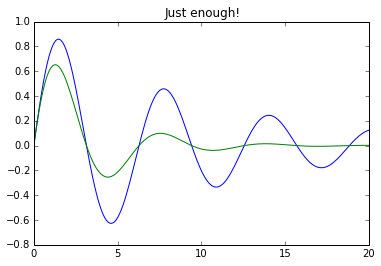

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
x=np.linspace(0,20,200)
y1=np.exp(-0.1*x)*np.sin(x)
y2=np.exp(-0.3*x)*np.sin(x)
plt.plot(x,y1)
plt.plot(x,y2)
plt.title('Just enough!')
plt.show()

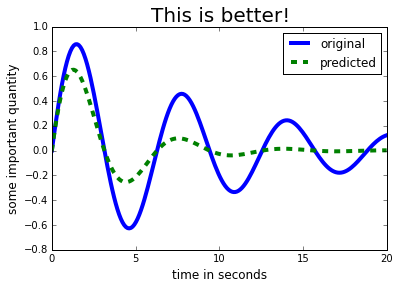

In [6]:
plt.plot(x,y1, label='original' ,linewidth=4, linestyle='-')
plt.plot(x,y2, label='predicted',linewidth=4, linestyle='--')
plt.xlabel('time in seconds',fontsize=12)
plt.ylabel(r'some important quantity',fontsize=12)
plt.title('This is better!',fontsize=20)
plt.legend()
plt.show()

SciPy
-----
* A collection of mathematical algorithms
* Gives Python similar capabilities as Matlab
* Many submodules are used for different domains
* We will see examples from `linalg` and `optimize` submodules
* For details: http://docs.scipy.org/doc/scipy/reference/tutorial/index.html


### `linalg`: Linear Algebra submodule ###
Linear algebra submodule provides several routines for matrix computations. For example to find the inverse of matrix $A$

$$
A = \left[\begin{array}{ccc} 
5 & 3 & 5\\
2 & 2 & 0\\
1 & 3 & 1
\end{array}\right]
$$ 

In [7]:
from scipy import linalg as la
A = np.array([
             [5,3,5], \
             [2,2,0], \
             [1,3,1]])
iA = A#la.inv(A)
print(iA)

[[5 3 5]
 [2 2 0]
 [1 3 1]]


Solving linear systems of equations
$$
Ax=b\\
$$
$$
\left[\begin{array}{ccc} 
5 & 3 & 5\\
2 & 2 & 0\\
1 & 3 & 1
\end{array}\right]
\left[\begin{array}{c} 
x_1 \\
x_2 \\
x_3 
\end{array}\right] 
=\left[\begin{array}{c} 
2 \\
5 \\
1
\end{array}\right]
$$ 


In [8]:
A = np.array([
             [5,3,5], \
             [2,2,0], \
             [1,3,1]])
b = np.array([ 2, 5, 1])
x = la.solve(A,b)
print('Solution:', x)
# x = la.inv(A).dot(b) # same result


('Solution:', array([ 2.25,  0.25, -2.  ]))


Matrix Decomposition
$$
\left[\begin{array}{ccc} 
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{array}\right] =
\left[\begin{array}{ccc} 
l_{11} & 0 & 0\\
l_{21} & l_{22} & 0\\
l_{31} & l_{32} & l_{33}
\end{array}\right]
\left[\begin{array}{ccc} 
u_{11} & u_{12} & u_{13}\\
0 & u_{22} & u_{23}\\
0 & 0 & u_{33}
\end{array}\right]
$$ 

In [9]:
p,l,u = la.lu(A,permute_l=False)
print('L = \n',l)
print('U = \n',u)

('L = \n', array([[ 1.        ,  0.        ,  0.        ],
       [ 0.2       ,  1.        ,  0.        ],
       [ 0.4       ,  0.33333333,  1.        ]]))
('U = \n', array([[ 5. ,  3. ,  5. ],
       [ 0. ,  2.4,  0. ],
       [ 0. ,  0. , -2. ]]))


### `optimize`: Optimization submodule ###
`optimize` implements several optimization algorithms. Optimization is finding the minimum or maximum value of a function. In this demonstration we will find the minimum of the `Levy` function:
$$f(x,y)=\sin ^{2}\left(3\pi x\right)+\left(x-1\right)^{2}\left(1+\sin ^{2}\left(3\pi y\right)\right)
{\displaystyle +\left(y-1\right)^{2}\left(1+\sin ^{2}\left(2\pi y\right)\right)} +\left(y-1\right)^{2}\left(1+\sin ^{2}\left(2\pi y\right)\right)$$

In [10]:
def obj(x):
    f = (np.sin(3*np.pi*x[0]))**2  +\
        (x[0]-1)**2 * (1+(np.sin(3*np.pi*x[1]))**2) +\
        (x[1]-1)**2 * (1+(np.sin(2*np.pi*x[1]))**2)
    #f=x[0]**2 + x[1]**2
    return f

### Visualizing the objective function ###

C:\Users\Najeeb\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


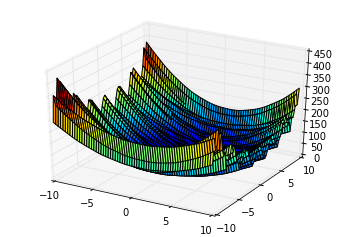

In [11]:
# Just for the visualization
def obj1(x,y):
    f = (np.sin(3*np.pi*x))**2  +\
        (x-1)**2 * (1+(np.sin(3*np.pi*y))**2) +\
        (y-1)**2 * (1+(np.sin(2*np.pi*y))**2) 
    #f=x**2 + y**2
    return f

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-10, 10, 0.3)
Y = np.arange(-10, 10, 0.3)
X, Y = np.meshgrid(X, Y)
Z = obj1(X,Y)
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, rstride=1, cstride=1 )
plt.show()

### Minimizing the objective function ###

In [12]:
# minimizing function
from scipy import optimize as opt
res = opt.minimize(obj, x0=[0.85,1.2], method='nelder-mead', options={'maxfev':1e6, 'maxiter':1e6} )
print('Minimum value: ',res.fun)
print('At x: ',res.x)
print('Analitical global minimum is at x = [1, 1] with value 0')

('Minimum value: ', 9.2670570627262192e-10)
('At x: ', array([ 1.0000027 ,  1.00001646]))
Analitical global minimum is at x = [1, 1] with value 0


Pandas
------

`pandas` provides easy-to-use data structures and data analysis tools for Python.
A good reference for Pandas is the cookbook available at: http://pandas.pydata.org/pandas-docs/stable/cookbook.html

The design matrix contains features as columns and examples as rows. In `pandas` jargon the design matrix is called a data frame; the examples are called series.

$$
D=\begin{pmatrix}
  &length & width & \cdots & type  \\
  S_1&80 & 25 & \cdots & 0 \\
  S_2&130 & 65 & \cdots & 1 \\
  \vdots&\vdots  & \vdots  & \ddots & \vdots  \\
  S_m&110 & 29 & \cdots & 0 
 \end{pmatrix}
$$

### Data Frame Creation ###

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df=pd.read_csv(url)
#df = pd.DataFrame(data,columns=['x','y','C'])
#df=pd.read_csv('iris.data')
df.columns=['sepal_length','sepal_width','petal_length','petal_width','flower_type']
df['flower_type'] = df['flower_type'].astype('category')
df.flower_type = df.flower_type.cat.rename_categories([0,1,2])

### Basic Analysis ###

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower_type
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [15]:
df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
flower_type     category
dtype: object

In [16]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
df['flower_type'].describe()

count     149
unique      3
top         2
freq       50
Name: flower_type, dtype: int64

### Data Frame Visualization ###

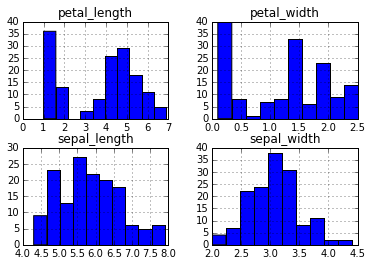

In [18]:
df.hist()
plt.show()

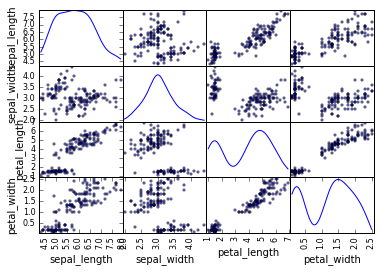

In [19]:
pd.scatter_matrix(df, diagonal='kde')
plt.show()

### Operations on the Data Frame ###

In [20]:
df = df.sort_values(by='sepal_width')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower_type
59,5.0,2.0,3.5,1.0,1
61,6.0,2.2,4.0,1.0,1
118,6.0,2.2,5.0,1.5,2
67,6.2,2.2,4.5,1.5,1
92,5.0,2.3,3.3,1.0,1


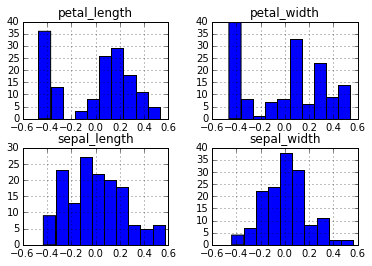

In [21]:
# Normalizing your data set
df=df.ix[:,0:4].apply( lambda f: ( f - f.mean() )/( f.max() - f.min() ) )

df.hist()
plt.show()

In [22]:
# Get a random sample from the data set
df=df.sample(frac=1.0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
83,-0.124534,-0.021253,0.122967,0.122763
47,-0.152312,0.270414,-0.385508,-0.418904
68,-0.068978,-0.229586,0.021272,-0.043904
135,0.125466,0.145414,0.309407,0.497763
50,0.153244,0.062081,0.122967,0.122763


In [23]:
# Split the data set into test and train set
train=df.sample(frac=0.8,random_state=123)
test=df.drop(train.index)

### Read/Write ###

In [24]:
df.to_csv('iris_normalized.csv')
new_df = pd.read_csv('iris_normalized.csv')

scikit-learn
-------------

A level above SciPy is Scikit-learn that implements many classification, regression and clustering algorithms. For details: http://scikit-learn.org/stable/tutorial/basic/tutorial.html

### Import the dataset ###

In [25]:
from sklearn import svm
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target


### Train the classifier ###

In [26]:
clf = svm.SVC()
clf.fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Make prediction ### 

In [27]:
clf.predict(iris.data[range(0,150,25)])

array([0, 0, 1, 1, 2, 2])

In [28]:
iris.target[range(0,150,25)]

array([0, 0, 1, 1, 2, 2])